## Lego DataSet Exploratory Data Analysis
### DataSci200 Project 2
#### https://www.kaggle.com/datasets/rtatman/lego-database?resource=download

![alt text](downloads_schema.png "Lego Scema")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)

In [4]:
# Import Individual Lego DataFrames
colors = pd.read_csv("data/colors.csv.gz")
parts = pd.read_csv("data/parts.csv.gz")
sets = pd.read_csv("data/sets.csv.gz")
themes = pd.read_csv("data/themes.csv.gz")
inventories = pd.read_csv("data/inventories.csv.gz")
inventory_parts = pd.read_csv("data/inventory_parts.csv.gz")
inventory_sets = pd.read_csv("data/inventory_sets.csv.gz")
part_categories = pd.read_csv("data/part_categories.csv.gz")
# Import IMDB data
# imdb_titles = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.basics.tsv.gz", sep= "\t")
# imdb_ratings = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.ratings.tsv.gz", sep= "\t")
imdb_titles = pd.read_csv("data/title.basics.tsv.gz", sep= "\t")
imdb_ratings = pd.read_csv("data/title.ratings.tsv.gz", sep= "\t")
# Import Box Office Data
box_office_numbers = pd.read_csv("data/boxofficemojotopfranchises.tsv", sep= "\t")

/var/folders/9q/9gpkvj2j0f96q8tymxt70vw00000gp/T/ipykernel_17686/2694968054.py:13: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles = pd.read_csv("data/title.basics.tsv.gz", sep= "\t")


In [5]:
# Filter to years for sets
sets = sets.loc[sets.year <= 2022]
print(f"IMDB is of shape {imdb_titles.shape}")
# Filter start year for imdb data
imdb_titles.loc[imdb_titles["startYear"]=="\\N", "startYear"] = np.nan
imdb_titles.dropna(subset=["startYear"], inplace=True)
imdb_titles["startYear"] = imdb_titles["startYear"].astype(int)
imdb_titles = imdb_titles[(imdb_titles["startYear"] >= 1950) & (imdb_titles["startYear"] <= 2022)]
print(f"IMDB is of shape {imdb_titles.shape} after date filter")

IMDB is of shape (9768338, 9)
IMDB is of shape (8154515, 9) after date filter


In [6]:
# Merging Sets and Themes to look at most common themes over time
sets_and_themes_df = sets.merge(themes, left_on="theme_id", right_on="id", how='left', suffixes=('_set', "_theme"))
sets_and_themes_df = sets_and_themes_df.loc[sets_and_themes_df.year <= 2022]
sets_and_themes_df.head(1000)

,set_num,name_set,year,theme_id,num_parts,img_url,id,name_theme,parent_id
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,1,Technic,NaN
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg,67,Classic Town,50.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg,143,Supplemental,126.0
5,0014-1,Space Mini-Figures,1979,143,2,https://cdn.rebrickable.com/media/sets/0014-1.jpg,143,Supplemental,126.0
6,0015-1,Space Mini-Figures,1979,143,18,https://cdn.rebrickable.com/media/sets/0015-1.jpg,143,Supplemental,126.0
7,0016-1,Castle Mini Figures,1979,189,15,https://cdn.rebrickable.com/media/sets/0016-1.jpg,189,Classic Castle,186.0
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,1,Technic,NaN
9,002253963-1,Legend of Chima: Corbeaux et Gorilles,2013,497,4,https://cdn.rebrickable.com/media/sets/0022539...,497,Books,NaN


In [7]:
theme_count = pd.DataFrame(sets_and_themes_df.name_theme.value_counts())
theme_count.columns = ["Count"]
theme_count.head(1000)

,Count
Star Wars,872
Technic,839
Key Chain,674
Books,598
Friends,520
Gear,481
Basic Set,473
Ninjago,459
Bionicle,435
Supplemental,435


In [8]:
theme_count.sort_index().head(1000)

,Count
12V,52
4 Juniors,23
4.5V,86
9V,100
Action Wheelers,9
Advent,6
Adventurers,1
Agents,13
Airlines,16
Airport,55


##### Some observations of the theme Data
Many themes could be grouped into superthemes like: 
- Aquaraiders
- Blacktron
- Space 
- Dinosaurs
- Disney
- Knights
- Jurrassic Park
- Matoran, Ninja
- Pirates, Planet
- Indiana Jones (Raiders of lost Ark, Temple of Doom,)
- Minifigures
- Spider-Man
- Star Wars
- The Lord of the Rings (The Fellowship of the Ring, The Hobbit, The Lord of the Rings, The Return of the King, The Two Towers)
- Toa
- Western

These grouping may be key to elucidating some of the trends with time and films so we will use the parent them going forward. We will need to impute the parent theme accordingly

In [9]:
# Parent_id is empty for the parents
sets_and_themes_df.isna().sum()

set_num          0
name_set         0
year             0
theme_id         0
num_parts        0
img_url          0
id               0
name_theme       0
parent_id     9182
dtype: int64

In [10]:
sets_and_themes_df.parent_id = sets_and_themes_df.parent_id.fillna(sets_and_themes_df.id)
sets_and_themes_df.isna().sum()

set_num       0
name_set      0
year          0
theme_id      0
num_parts     0
img_url       0
id            0
name_theme    0
parent_id     0
dtype: int64

In [11]:
id_themes = sets_and_themes_df[["id","name_theme"]].drop_duplicates()
id_themes

,id,name_theme
0,1,Technic
1,67,Classic Town
2,199,Lion Knights
3,143,Supplemental
7,189,Classic Castle
9,497,Books
10,366,Basic Set
16,453,Technic
25,652,Playhouse
26,505,Basic Set


In [12]:
sets_and_themes_df = sets_and_themes_df.merge(id_themes, left_on="parent_id", right_on="id", suffixes=("","_parent"))
sets_and_themes_df.drop(columns=["id_parent"],inplace=True)
sets_and_themes_df.rename(columns={"name_theme_parent":"parent_theme"}, inplace=True)
sets_and_themes_df.head(1000)

,set_num,name_set,year,theme_id,num_parts,img_url,id,name_theme,parent_id,parent_theme
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,1,Technic,1.0,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,1,Technic,1.0,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,1,Technic,1.0,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,1,Technic,1.0,Technic
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,1,Technic,1.0,Technic
5,1061-1,Single Disk Pack,2000,20,0,https://cdn.rebrickable.com/media/sets/1061-1.jpg,20,Throwbot Slizer,1.0,Technic
6,1237-1,Honda Promotional Set,2001,1,56,https://cdn.rebrickable.com/media/sets/1237-1.jpg,1,Technic,1.0,Technic
7,1257-1,Trike Buggy,1999,1,30,https://cdn.rebrickable.com/media/sets/1257-1.jpg,1,Technic,1.0,Technic
8,1258-1,Propellor Buggy,1999,1,29,https://cdn.rebrickable.com/media/sets/1258-1.jpg,1,Technic,1.0,Technic
9,1259-1,Motorbike,1999,1,28,https://cdn.rebrickable.com/media/sets/1259-1.jpg,1,Technic,1.0,Technic


In [13]:
theme_count = pd.DataFrame(sets_and_themes_df.parent_theme.value_counts())
theme_count.columns = ["Count"]
theme_count

,Count
Gear,3091
Duplo,1263
Star Wars,889
Collectible Minifigures,803
City,792
Service Packs,781
Town,764
Educational and Dacta,655
Books,606
Technic,540


The below plot shows the most common themes by number of sets included within the theme

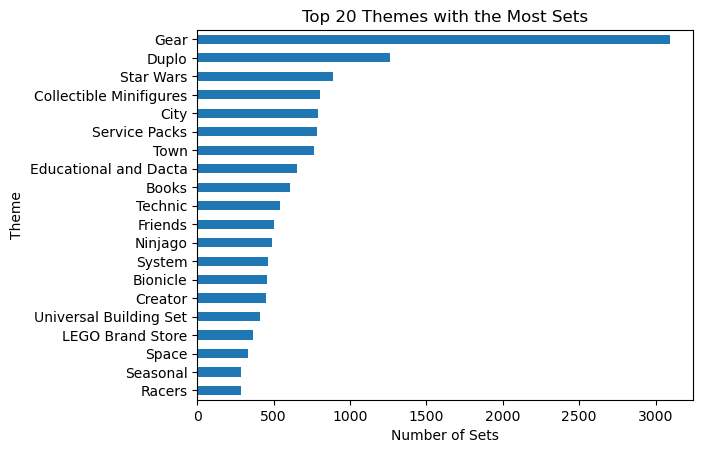

In [14]:
theme_count[:20].plot.barh(legend=False)
plt.ylabel("Theme")
plt.xlabel("Number of Sets")
plt.title("Top 20 Themes with the Most Sets")
plt.gca().invert_yaxis()
plt.show()

In [15]:
# Most Popular Theme By Year
counts_by_year_by_theme = sets_and_themes_df[["year", "parent_theme","set_num"]].groupby(["year", "parent_theme"]).count().sort_values(by="year").reset_index()
counts_by_year_by_theme["max_sets"] = counts_by_year_by_theme[["year", "set_num"]].groupby("year").transform(max)
max_counts_by_year_by_theme = counts_by_year_by_theme[counts_by_year_by_theme.set_num == counts_by_year_by_theme.max_sets]
max_counts_by_year_by_theme

,year,parent_theme,set_num,max_sets
0,1949,System,5,5
1,1950,System,6,6
2,1953,System,4,4
3,1954,System,14,14
6,1955,System,35,35
7,1956,System,16,16
10,1957,System,20,20
12,1958,System,57,57
13,1959,System,4,4
14,1960,System,1,1


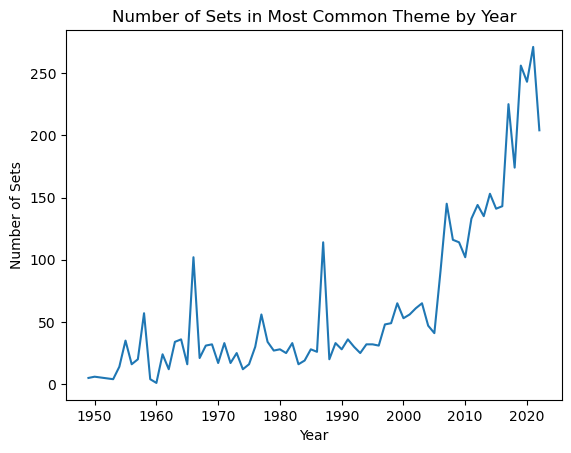

In [16]:
sns.lineplot(data=max_counts_by_year_by_theme, x="year", y="max_sets")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of Sets in Most Common Theme by Year")
plt.show()

/var/folders/9q/9gpkvj2j0f96q8tymxt70vw00000gp/T/ipykernel_17686/683201041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_counts_by_year_by_theme.rename(columns={"parent_theme":"Theme"}, inplace=True)


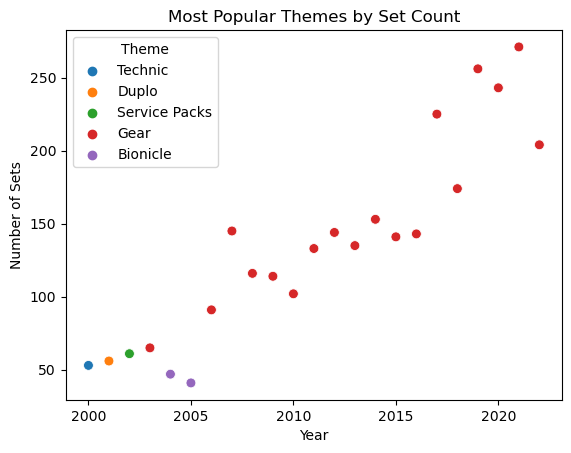

In [17]:
max_counts_by_year_by_theme.rename(columns={"parent_theme":"Theme"}, inplace=True)
max_counts_by_year_by_theme_since_2000 = max_counts_by_year_by_theme[max_counts_by_year_by_theme.year >= 2000]
sns.scatterplot(data=max_counts_by_year_by_theme_since_2000, x="year", y="max_sets", hue="Theme", s=50)
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Most Popular Themes by Set Count")
plt.show()

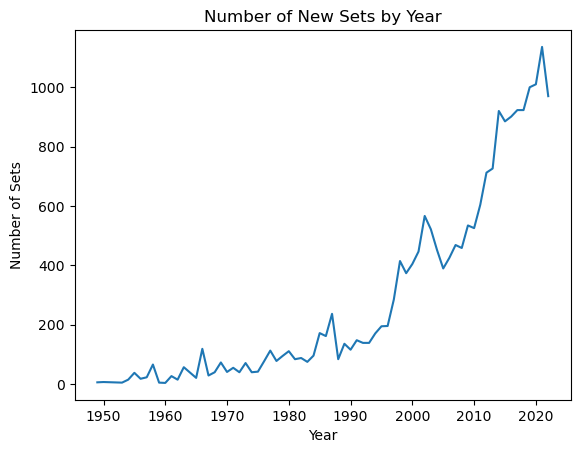

In [18]:
sets = sets.loc[sets.year <= 2022]
new_sets_by_year = sets[["year","set_num"]].groupby(["year"]).count().reset_index()
sns.lineplot(data=new_sets_by_year, x="year", y="set_num")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of New Sets by Year")
plt.show()

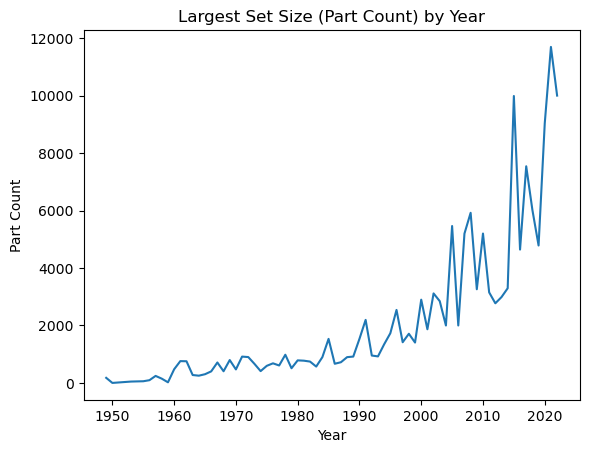

In [19]:
max_part_number_by_year = sets.groupby("year")["num_parts"].max()
max_part_number_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Part Count")
plt.title("Largest Set Size (Part Count) by Year")
plt.show()

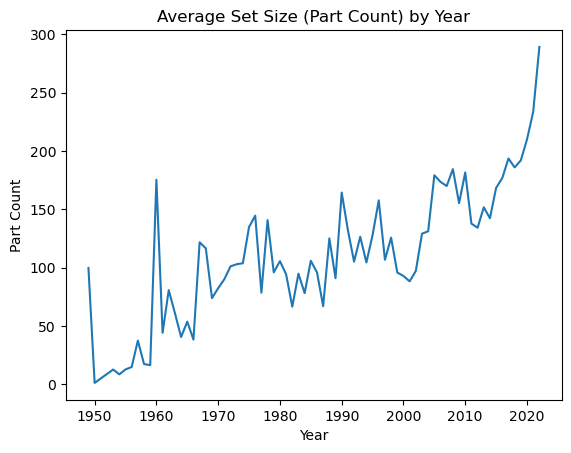

In [20]:
avg_part_number_by_year = sets.groupby("year")["num_parts"].mean()
avg_part_number_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Part Count")
plt.title("Average Set Size (Part Count) by Year")
plt.show()

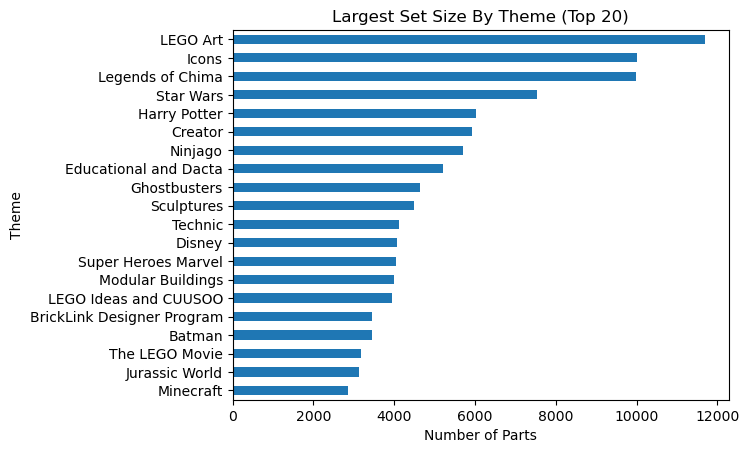

In [21]:
max_parts_by_theme = sets_and_themes_df.groupby("parent_theme")["num_parts"].max().sort_values(ascending=False)
max_parts_by_theme[0:20].plot.barh()
plt.ylabel("Theme")
plt.xlabel("Number of Parts")
plt.title("Largest Set Size By Theme (Top 20)")
plt.gca().invert_yaxis()
plt.show()

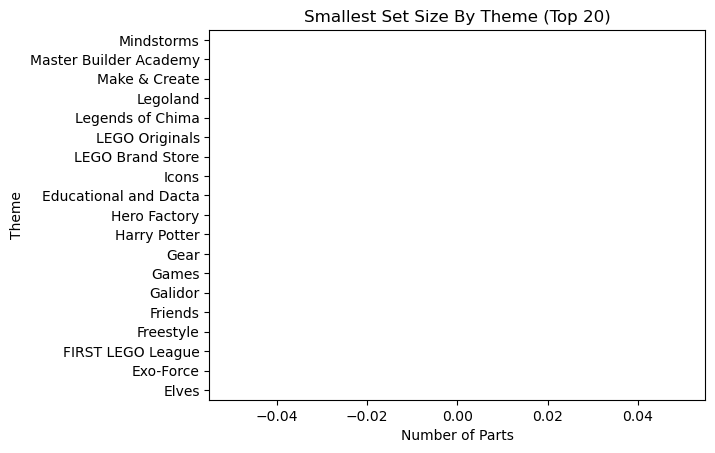

In [22]:
min_parts_by_theme = sets_and_themes_df.groupby("parent_theme")["num_parts"].min().sort_values(ascending=False)
min_parts_by_theme[-20:-1].plot.barh()
plt.ylabel("Theme")
plt.xlabel("Number of Parts")
plt.title("Smallest Set Size By Theme (Top 20)")
plt.gca().invert_yaxis()
plt.show()

<Axes: >

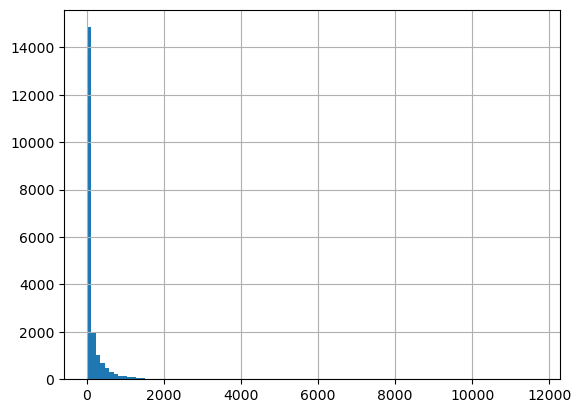

In [23]:
sets_and_themes_df["num_parts"].hist(bins=100)

In [24]:
theme_count.sort_index()

,Count
4 Juniors,54
Advent,56
Agents,28
Alpha Team,31
Angry Birds,6
Aquazone,37
Architecture,59
Atlantis,24
Avatar,4
Avatar: The Last Airbender,2


#### Movie Related Themes
- Star Wars
- Harry Potter
- The Hobbit/The Lord of the Rings
- Pirates Of The Caribean
- Teenage Mutant Ninja Turtles
- Indiana Jones
- Jurrasic World
- The Lone Ranger
- The Lego Movie 
- Avatar
- Batman
- Prince of Persia

In [25]:
imdb_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime"
13082,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,\N,94,Documentary
15178,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N
15486,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
21274,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,Western


For IMDB data I am only interested in movies overlapping with the lego data sets and Movies or TV
- Filter out by year
- filter out by titleType

A big assumption here is that I am only looking at box office feature films and not short, videos, tv, and streaming content associated with these franchises

In [26]:
# imdb_titles["titleType"].unique()
imdb_titles = imdb_titles.loc[imdb_titles["titleType"] == "movie"]
print(f"IMDB is of shape {imdb_titles.shape} after movie filter")

IMDB is of shape (473381, 9) after movie filter


In [27]:
theme_imdb = imdb_titles[imdb_titles["primaryTitle"].str.contains(r'\blord of the rings\b', regex=True, case=False)]
theme_imdb

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
76239,tt0077869,movie,The Lord of the Rings,The Lord of the Rings,0,1978,\N,132,"Adventure,Animation,Fantasy"
117839,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama"
161622,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama"
161623,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0,2002,\N,179,"Action,Adventure,Drama"
1027402,tt10107410,movie,Music of the Lord of the Rings,Music of the Lord of the Rings,0,2019,\N,59,Documentary
1888769,tt11656828,movie,J.R.R. Tolkien and the Birth of Lord of the Rings,J.R.R. Tolkien and the Birth of Lord of the Rings,0,2004,\N,60,Documentary
3357894,tt14364910,movie,Darla's Book Club: Discussing the Lord of the ...,Darla's Book Club: Discussing the Lord of the ...,0,2021,\N,49,Family
6402450,tt26863616,movie,How They Adapted Lord of the Rings (the good one),How They Adapted Lord of the Rings (the good one),0,2022,\N,\N,"Comedy,Documentary,Fantasy"
6810799,tt3342322,movie,The Lord of the Rings Symphony,The Lord of the Rings Symphony,0,2003,\N,105,Music
9719179,tt9810488,movie,The Lord of the Rings - The Appendices Part 1:...,The Lord of the Rings - The Appendices Part 1:...,0,2002,\N,200,Documentary


In [28]:
franchise_dict = {"Star Wars": {"regex": r'\bstar wars\b', 
                               "movies": ["Star Wars: Episode IV - A New Hope", 
                                          "Star Wars: Episode V - The Empire Strikes Back", 
                                          "Star Wars: Episode VI - Return of the Jedi", 
                                          "Star Wars: Episode I - The Phantom Menace",
                                          "Star Wars: Episode II - Attack of the Clones",
                                          "Star Wars: Episode III - Revenge of the Sith",
                                          "Star Wars: Episode VII - The Force Awakens",
                                          "Star Wars: Episode VIII - The Last Jedi",
                                          "Star Wars: Episode IX - The Rise of Skywalker",
                                          "Solo: A Star Wars Story",
                                          "Rogue One: A Star Wars Story",
                                          "Solo: A Star Wars Story"]},
                  "Harry Potter": {"regex": r'\bharry potter\b', 
                                  "movies":["Harry Potter and the Sorcerer's Stone",
                                            "Harry Potter and the Chamber of Secrets",
                                            "Harry Potter and the Prisoner of Azkaban",
                                            "Harry Potter and the Goblet of Fire",
                                            "Harry Potter and the Order of the Phoenix",
                                            "Harry Potter and the Half-Blood Prince",
                                            "Harry Potter and the Deathly Hallows: Part 1",
                                            "Harry Potter and the Deathly Hallows: Part 2"]}}

In [29]:
def null_years_to_zero(df, df_imdb):
    min_year = np.min(df_imdb["startYear"])
    max_year = np.max(df_imdb["startYear"])
    df = df.set_index('year')
    df_new = pd.DataFrame({"year":range(min_year-5,min(2022,max_year+5)), "set_num": 0}).set_index("year")
    df_new["set_num"]=df["set_num"]
    df_new.fillna(0, inplace=True)
    df_new.reset_index(inplace=True)
    return df_new

In [30]:
def plot_movies_and_lego_sets(lego_df, imdb_df, movie_dict, name):
    pattern = movie_dict[name]["regex"]
    movie_list = movie_dict[name]["movies"]
    lego = lego_df.loc[lego_df["parent_theme"].str.contains(pattern, regex=True, case=False)]
    lego = pd.DataFrame(lego.groupby("year")["set_num"].count()).reset_index()
    imdb = imdb_df[imdb_df["primaryTitle"].isin(movie_list)].sort_values(by="startYear").reset_index()
    cmap = plt.cm.get_cmap('hsv', len(imdb))
    for i in range(len(imdb)):
        year = imdb.loc[i, "startYear"]
        title = imdb.loc[i, "primaryTitle"]
        color = cmap(i)
        plt.axvline(x=year, c=color, label=f"{year}: {title}")
    lego = null_years_to_zero(lego, imdb)
    sns.lineplot(data=lego, x="year", y="set_num", marker="o")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel("Number of Sets")
    plt.xlabel("Year")
    plt.title("Number of Lego Sets by Year with Movie Releases")
    plt.show()

/var/folders/9q/9gpkvj2j0f96q8tymxt70vw00000gp/T/ipykernel_17686/771229828.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(imdb))


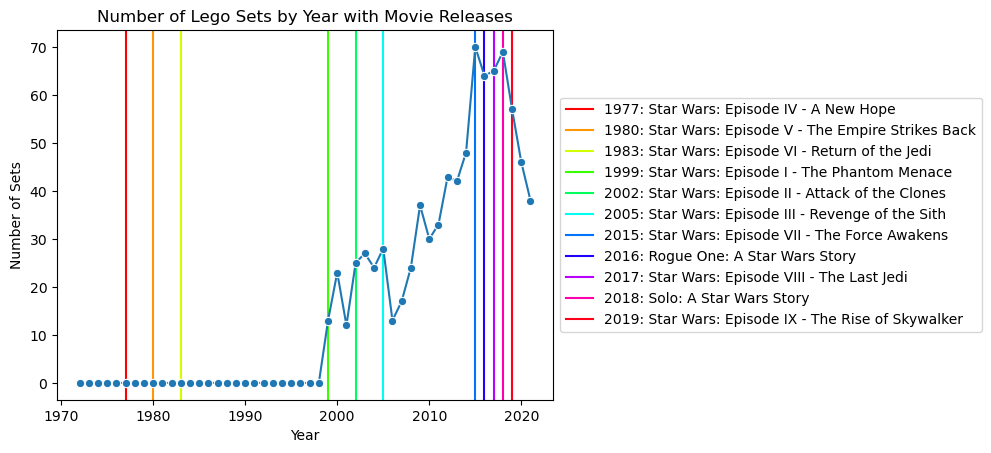

In [31]:
plot_movies_and_lego_sets(sets_and_themes_df, imdb_titles, franchise_dict, "Star Wars")

/var/folders/9q/9gpkvj2j0f96q8tymxt70vw00000gp/T/ipykernel_17686/771229828.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(imdb))


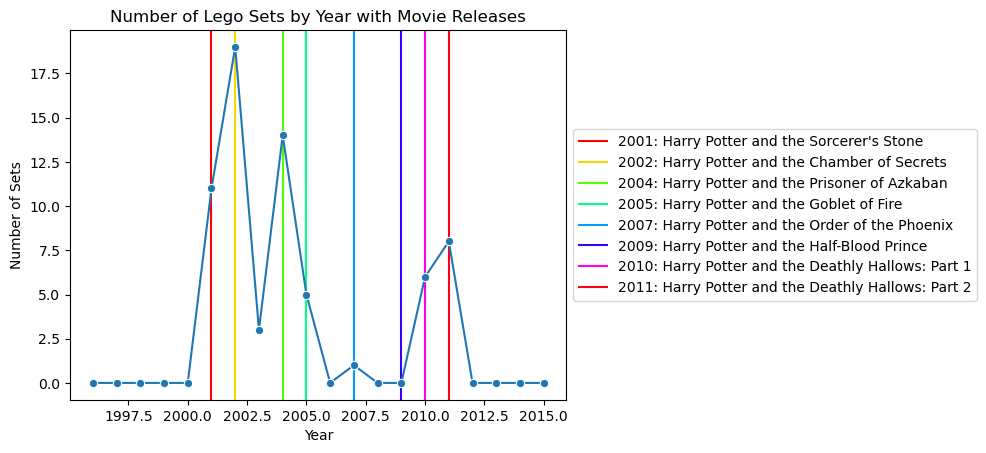

In [32]:
plot_movies_and_lego_sets(sets_and_themes_df, imdb_titles, franchise_dict, "Harry Potter")

In [33]:
themes.loc[themes["name"].str.contains(r'lord', regex=True, case=False)]

,id,name,parent_id
307,561,The Hobbit and Lord of the Rings,NaN
309,566,The Lord of the Rings,561.0


## Are there any commonalities between the most popular LEGO sets and the highest-grossing movies on IMDb? For example, do the top-rated LEGO sets and movies tend to be from the same franchises or genres?

In [34]:
imdb_genres = imdb_titles['genres'].unique()
imdb_genres

array(['Action,Crime', 'Documentary', '\\N', ..., 'Action,Crime,Short',
       'Biography,Fantasy,Musical', 'Crime,Fantasy,Sci-Fi'], dtype=object)

In [35]:
imdb_titles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime"
13082,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,\N,94,Documentary
15178,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N
15486,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
21274,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,Western
...,...,...,...,...,...,...,...,...,...
9768229,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
9768256,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
9768268,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
9768278,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [36]:
sets_and_themes_df['parent_theme'].unique()

array(['Technic', 'Town', 'Castle', 'Space', 'Books', 'System',
       'Service Packs', 'Duplo', 'Creator', 'Universal Building Set',
       'Gear', 'Educational and Dacta', 'Train', 'Bulk Bricks',
       'Star Wars', 'Hobby Sets', 'Bionicle', 'Discovery', 'Seasonal',
       'Super Heroes Marvel', 'Clikits', 'LEGO Brand Store', 'Sports',
       'Harry Potter', 'Model Team', 'City', 'Other', 'Modular Buildings',
       'Factory', 'Monster Fighters', 'Legoland', 'Christmas', 'Icons',
       'Mindstorms', 'Classic', 'Promotional', 'Make & Create', 'Juniors',
       'Toy Story', 'Disney', 'Super Heroes DC', 'Aquazone', 'Ninja',
       'Ninjago', 'Minitalia', 'Primo', 'LEGO Originals', 'Hero Factory',
       'Racers', 'Fabuland', 'Jurassic World', 'Rock Raiders', 'Advent',
       'Studios', 'Alpha Team', '4 Juniors', 'Monkie Kid', 'Value Packs',
       'Building Set with People', 'Boat', 'Freestyle', 'Time Cruisers',
       'BrickLink Designer Program', 'Architecture', 'Indiana Jones',
    

In [37]:
# box_office_numbers['Franchise'].unique()
box_office_numbers.head()

,Franchise,Total,Releases,#1 Release,Lifetime Gross
0,Marvel Cinematic Universe,9892046843,30,Avengers: Endgame,858373000
1,Star Wars,5081703177,21,Star Wars: Episode VII - The Force Awakens,936662225
2,Disney Live Action Reimaginings,3493794115,17,The Lion King,543638043
3,Spider-Man,3269168524,10,Spider-Man: No Way Home,772170405
4,J.K. Rowling's Wizarding World,2787740350,27,Harry Potter and the Deathly Hallows: Part 2,381011219


In [38]:
# sets_and_themes_df['name_theme'].unique()

In [39]:
parent_themes = sets_and_themes_df['parent_theme'].unique()
parent_themes

array(['Technic', 'Town', 'Castle', 'Space', 'Books', 'System',
       'Service Packs', 'Duplo', 'Creator', 'Universal Building Set',
       'Gear', 'Educational and Dacta', 'Train', 'Bulk Bricks',
       'Star Wars', 'Hobby Sets', 'Bionicle', 'Discovery', 'Seasonal',
       'Super Heroes Marvel', 'Clikits', 'LEGO Brand Store', 'Sports',
       'Harry Potter', 'Model Team', 'City', 'Other', 'Modular Buildings',
       'Factory', 'Monster Fighters', 'Legoland', 'Christmas', 'Icons',
       'Mindstorms', 'Classic', 'Promotional', 'Make & Create', 'Juniors',
       'Toy Story', 'Disney', 'Super Heroes DC', 'Aquazone', 'Ninja',
       'Ninjago', 'Minitalia', 'Primo', 'LEGO Originals', 'Hero Factory',
       'Racers', 'Fabuland', 'Jurassic World', 'Rock Raiders', 'Advent',
       'Studios', 'Alpha Team', '4 Juniors', 'Monkie Kid', 'Value Packs',
       'Building Set with People', 'Boat', 'Freestyle', 'Time Cruisers',
       'BrickLink Designer Program', 'Architecture', 'Indiana Jones',
    

In [40]:
import re

def remove_articles(text):
    return re.sub('\s+(a|an|and|the|of|&)(\s+)', ' ', text)

themes_dict = {}
for theme in parent_themes:
    txt = remove_articles(theme.lower())
    theme_words = txt.split(' ')
    for word in theme_words:
        if not word.isnumeric():
            
            if theme not in themes_dict:
                themes_dict[theme] = []
            themes_dict[theme].append(word)

themes_dict

{'Technic': ['technic'],
 'Town': ['town'],
 'Castle': ['castle'],
 'Space': ['space'],
 'Books': ['books'],
 'System': ['system'],
 'Service Packs': ['service', 'packs'],
 'Duplo': ['duplo'],
 'Creator': ['creator'],
 'Universal Building Set': ['universal', 'building', 'set'],
 'Gear': ['gear'],
 'Educational and Dacta': ['educational', 'dacta'],
 'Train': ['train'],
 'Bulk Bricks': ['bulk', 'bricks'],
 'Star Wars': ['star', 'wars'],
 'Hobby Sets': ['hobby', 'sets'],
 'Bionicle': ['bionicle'],
 'Discovery': ['discovery'],
 'Seasonal': ['seasonal'],
 'Super Heroes Marvel': ['super', 'heroes', 'marvel'],
 'Clikits': ['clikits'],
 'LEGO Brand Store': ['lego', 'brand', 'store'],
 'Sports': ['sports'],
 'Harry Potter': ['harry', 'potter'],
 'Model Team': ['model', 'team'],
 'City': ['city'],
 'Other': ['other'],
 'Modular Buildings': ['modular', 'buildings'],
 'Factory': ['factory'],
 'Monster Fighters': ['monster', 'fighters'],
 'Legoland': ['legoland'],
 'Christmas': ['christmas'],
 'Ico

In [41]:
franchise_dict = {"Star Wars": {"regex": r'\bstar wars\b', 
                               "movies": ["Star Wars: Episode IV - A New Hope", 
                                          "Star Wars: Episode V - The Empire Strikes Back", 
                                          "Star Wars: Episode VI - Return of the Jedi", 
                                          "Star Wars: Episode I - The Phantom Menace",
                                          "Star Wars: Episode II - Attack of the Clones",
                                          "Star Wars: Episode III - Revenge of the Sith",
                                          "Star Wars: Episode VII - The Force Awakens",
                                          "Star Wars: Episode VIII - The Last Jedi",
                                          "Star Wars: Episode IX - The Rise of Skywalker",
                                          "Solo: A Star Wars Story",
                                          "Rogue One: A Star Wars Story",
                                          "Solo: A Star Wars Story"]},
                  "Harry Potter": {"regex": r'\bharry potter\b', 
                                  "movies":["Harry Potter and the Sorcerer's Stone",
                                            "Harry Potter and the Chamber of Secrets",
                                            "Harry Potter and the Prisoner of Azkaban",
                                            "Harry Potter and the Goblet of Fire",
                                            "Harry Potter and the Order of the Phoenix",
                                            "Harry Potter and the Half-Blood Prince",
                                            "Harry Potter and the Deathly Hallows: Part 1",
                                            "Harry Potter and the Deathly Hallows: Part 2"]},
                 "Jurassic Park": {"regex": r'\bJurassic\b', 
                                  "movies": ["Jurassic Park", 
                                             "The Lost World: Jurassic Park", 
                                             "Jurassic Park III", 
                                             "Jurassic World", 
                                             "Jurassic World: Fallen Kingdom", 
                                             "Jurassic World: Dominion"]},
                  "Batman": {"regex": r'\bbatman\b', 
                                  "movies": ["Batman: The Movie",
                                             "Batman",
                                             "Batman Returns",
                                             "Batman: Mask of the Phantasm",
                                             "Batman Forever",
                                             "Batman & Robin",
                                             "Batman Begins",
                                             "The Dark Knight",
                                             "The Dark Knight Rises",
                                             "Batman v Superman: Dawn of Justice",
                                             "The Lego Batman Movie",
                                             "The Batman"]},
                 "Lord of the Rings": {"regex": r'\bLord of the Rings\b', 
                                       "movies": ["The Hobbit: An Unexpected Journey",
                                                  "The Hobbit: The Desolation of Smaug",
                                                  "The Hobbit: The Battle of the Five Armies",
                                                  "The Lord of the Rings: The Fellowship of the Ring",
                                                  "The Lord of the Rings: The Two Towers",
                                                  "The Lord of the Rings: The Return of the King"]},
                  "Indiana Jones": {"regex": r'\bIndiana Jones\b', 
                                    "movies": ["Raiders of the Lost Ark",
                                               "Indiana Jones and the Temple of Doom",
                                               "Indiana Jones and the Last Crusade",
                                               "Indiana Jones and the Kingdom of the Crystal Skull"]},
                 "Pirates of the Caribbean": {"regex": r'\bpirates of the caribbean\b',
                                              "movies": ["Pirates of the Caribbean: The Curse of the Black Pearl",
                                                         "Pirates of the Caribbean: Dead Man's Chest",
                                                         "Pirates of the Caribbean: At World's End",
                                                         "Pirates of the Caribbean: On Stranger Tides",
                                                         "Pirates of the Caribbean: Dead Men Tell No Tales"]},
                 "Minions": {"regex": r'\bMinions\b',
                             "movies": ["Minions",
                                        "Minions: The Rise of Gru"]},
                 "Trolls": {"regex": r'\bTrolls\b',
                            "movies": ["Trolls",
                                       "Trolls 2: World Tour"]}}

In [42]:
print(box_office_numbers.shape)
box_office_numbers

(292, 5)


,Franchise,Total,Releases,#1 Release,Lifetime Gross
0,Marvel Cinematic Universe,9892046843,30,Avengers: Endgame,858373000
1,Star Wars,5081703177,21,Star Wars: Episode VII - The Force Awakens,936662225
2,Disney Live Action Reimaginings,3493794115,17,The Lion King,543638043
3,Spider-Man,3269168524,10,Spider-Man: No Way Home,772170405
4,J.K. Rowling's Wizarding World,2787740350,27,Harry Potter and the Deathly Hallows: Part 2,381011219
5,Avengers,2619552260,4,Avengers: Endgame,858373000
6,X-Men,2458462356,14,Deadpool,363070709
7,Batman,2411044358,18,The Dark Knight,533345358
8,Harry Potter,2394146874,25,Harry Potter and the Deathly Hallows: Part 2,381011219
9,James Bond,2273796409,26,Skyfall,304360277


In [43]:
def known_franchise(row):
    for name in franchise_dict.keys():
        pattern = franchise_dict[name]['regex']
#         print(f'patttern: {pattern}, franchise: {row["Franchise"]}')
        if re.search(pattern, row['Franchise'], re.IGNORECASE):
            return name
    return "unknown"

box_office_numbers['known_franchise'] = box_office_numbers.apply(known_franchise, axis=1)
box_office_numbers

,Franchise,Total,Releases,#1 Release,Lifetime Gross,known_franchise
0,Marvel Cinematic Universe,9892046843,30,Avengers: Endgame,858373000,unknown
1,Star Wars,5081703177,21,Star Wars: Episode VII - The Force Awakens,936662225,Star Wars
2,Disney Live Action Reimaginings,3493794115,17,The Lion King,543638043,unknown
3,Spider-Man,3269168524,10,Spider-Man: No Way Home,772170405,unknown
4,J.K. Rowling's Wizarding World,2787740350,27,Harry Potter and the Deathly Hallows: Part 2,381011219,unknown
5,Avengers,2619552260,4,Avengers: Endgame,858373000,unknown
6,X-Men,2458462356,14,Deadpool,363070709,unknown
7,Batman,2411044358,18,The Dark Knight,533345358,Batman
8,Harry Potter,2394146874,25,Harry Potter and the Deathly Hallows: Part 2,381011219,Harry Potter
9,James Bond,2273796409,26,Skyfall,304360277,unknown


In [44]:
# test = re.search(r'\bpirates of the caribbean\b', 'Pirates of the Caribbean', re.IGNORECASE)
# print(test)

In [45]:
known_franchise_box_office = box_office_numbers[box_office_numbers['known_franchise'] != 'unknown']
known_franchise_box_office

,Franchise,Total,Releases,#1 Release,Lifetime Gross,known_franchise
1,Star Wars,5081703177,21,Star Wars: Episode VII - The Force Awakens,936662225,Star Wars
7,Batman,2411044358,18,The Dark Knight,533345358,Batman
8,Harry Potter,2394146874,25,Harry Potter and the Deathly Hallows: Part 2,381011219,Harry Potter
11,Jurassic Park,1884578659,9,Jurassic World,652270625,Jurassic Park
15,Pirates of the Caribbean,1451780833,5,Pirates of the Caribbean: Dead Man's Chest,423315812,Pirates of the Caribbean
25,The Lord of the Rings,1066984110,10,The Lord of the Rings: The Return of the King,377027325,Lord of the Rings
27,Indiana Jones,942303167,7,Indiana Jones and the Kingdom of the Crystal S...,317101119,Indiana Jones
39,Star Wars Anthology,745944836,2,Rogue One: A Star Wars Story,532177324,Star Wars
115,Minions,336045770,1,Minions,336045770,Minions
196,Trolls,153707064,1,Trolls,153707064,Trolls


In [46]:
grouped_franchise = known_franchise_box_office[['known_franchise', 'Lifetime Gross']].groupby('known_franchise').sum()
grouped_franchise = grouped_franchise.reset_index()
grouped_franchise

,known_franchise,Lifetime Gross
0,Batman,533345358
1,Harry Potter,381011219
2,Indiana Jones,317101119
3,Jurassic Park,652270625
4,Lord of the Rings,377027325
5,Minions,336045770
6,Pirates of the Caribbean,423315812
7,Star Wars,1468839549
8,Trolls,153707064


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Trolls'),
  Text(1, 0, 'Indiana Jones'),
  Text(2, 0, 'Minions'),
  Text(3, 0, 'Lord of the Rings'),
  Text(4, 0, 'Harry Potter'),
  Text(5, 0, 'Pirates of the Caribbean'),
  Text(6, 0, 'Batman'),
  Text(7, 0, 'Jurassic Park'),
  Text(8, 0, 'Star Wars')])

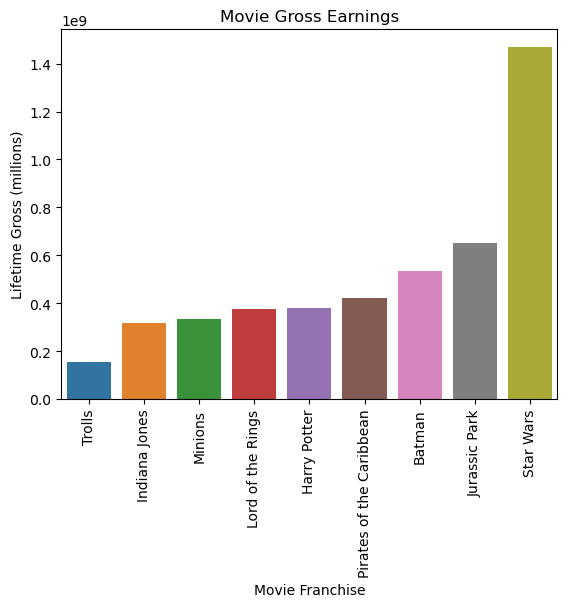

In [47]:
# TODO: Generate visualization showing known franschise and lifetime gross amounts
bp = sns.barplot(data=grouped_franchise, x='known_franchise',
                 y='Lifetime Gross', order=grouped_franchise.sort_values('Lifetime Gross').known_franchise)
bp.set(title='Movie Gross Earnings', ylabel='Lifetime Gross (millions)', xlabel='Movie Franchise')
#bp.set(xticklabels=[])
#bp.tick_params(bottom=False)
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
plt.xticks(rotation=90)

In [48]:
def known_theme(row):
    for name in franchise_dict.keys():
        pattern = franchise_dict[name]['regex']
#         print(f'patttern: {pattern}, franchise: {row["Franchise"]}')
        if re.search(pattern, row['parent_theme'], re.IGNORECASE):
            return name
    return "unknown"

sets_and_themes_df['known_theme'] = sets_and_themes_df.apply(known_theme, axis=1)
sets_and_themes_df.head()

,set_num,name_set,year,theme_id,num_parts,img_url,id,name_theme,parent_id,parent_theme,known_theme
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,1,Technic,1.0,Technic,unknown
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,1,Technic,1.0,Technic,unknown
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,1,Technic,1.0,Technic,unknown
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,1,Technic,1.0,Technic,unknown
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,1,Technic,1.0,Technic,unknown


In [49]:
franchise_sets = sets_and_themes_df[sets_and_themes_df['known_theme'] != 'unknown']
franchise_sets.head()

,set_num,name_set,year,theme_id,num_parts,img_url,id,name_theme,parent_id,parent_theme,known_theme
9604,10018-1,Darth Maul,2001,171,1868,https://cdn.rebrickable.com/media/sets/10018-1...,171,Ultimate Collector Series,158.0,Star Wars,Star Wars
9605,10019-1,Rebel Blockade Runner,2001,171,1748,https://cdn.rebrickable.com/media/sets/10019-1...,171,Ultimate Collector Series,158.0,Star Wars,Star Wars
9606,10026-1,Naboo Starfighter,2002,171,188,https://cdn.rebrickable.com/media/sets/10026-1...,171,Ultimate Collector Series,158.0,Star Wars,Star Wars
9607,10030-1,Imperial Star Destroyer,2002,171,3116,https://cdn.rebrickable.com/media/sets/10030-1...,171,Ultimate Collector Series,158.0,Star Wars,Star Wars
9608,10123-1,Cloud City,2003,171,707,https://cdn.rebrickable.com/media/sets/10123-1...,171,Ultimate Collector Series,158.0,Star Wars,Star Wars


In [50]:
grouped_sets = franchise_sets[['known_theme', 'name_set']].groupby('known_theme').count()
grouped_sets = grouped_sets.reset_index()
grouped_sets

,known_theme,name_set
0,Batman,49
1,Harry Potter,134
2,Indiana Jones,20
3,Jurassic Park,74
4,Minions,9
5,Pirates of the Caribbean,17
6,Star Wars,889
7,Trolls,9


In [51]:
grouped_sets = grouped_sets.rename(columns={'known_theme': 'known_franchise', 'name_set': 'Num Sets'})
grouped_sets

,known_franchise,Num Sets
0,Batman,49
1,Harry Potter,134
2,Indiana Jones,20
3,Jurassic Park,74
4,Minions,9
5,Pirates of the Caribbean,17
6,Star Wars,889
7,Trolls,9


In [52]:
earnings_and_sets = grouped_sets.merge(grouped_franchise, left_on='known_franchise', right_on='known_franchise')
earnings_and_sets

,known_franchise,Num Sets,Lifetime Gross
0,Batman,49,533345358
1,Harry Potter,134,381011219
2,Indiana Jones,20,317101119
3,Jurassic Park,74,652270625
4,Minions,9,336045770
5,Pirates of the Caribbean,17,423315812
6,Star Wars,889,1468839549
7,Trolls,9,153707064


In [53]:
def get_bar_label(label_val):
    if label_val > 1000:
#         res_val = f'{round(label_val, 1)}'
        res_val = f'{round(label_val / 1000000, 1)}'
    else:
        res_val = str(int(label_val))
    return res_val

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Trolls'),
  Text(1, 0, 'Indiana Jones'),
  Text(2, 0, 'Minions'),
  Text(3, 0, 'Harry Potter'),
  Text(4, 0, 'Pirates of the Caribbean'),
  Text(5, 0, 'Batman'),
  Text(6, 0, 'Jurassic Park'),
  Text(7, 0, 'Star Wars')])

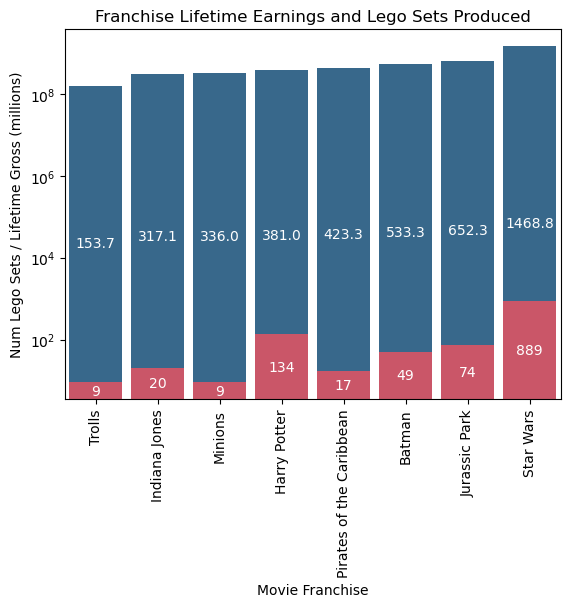

In [54]:
ax = plt.subplots()

ax = sns.barplot(x=earnings_and_sets['known_franchise'], y=earnings_and_sets['Lifetime Gross'],
                 order=earnings_and_sets.sort_values('Lifetime Gross').known_franchise, color='#2a6a99', width=.85)


ax = sns.barplot(x=earnings_and_sets['known_franchise'], y=earnings_and_sets['Num Sets'],
                 order=earnings_and_sets.sort_values('Lifetime Gross').known_franchise, color='#de425b', width=.85)

# iterate through each container
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [get_bar_label(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', color='white')

ax.set(title='Franchise Lifetime Earnings and Lego Sets Produced', ylabel='Num Lego Sets / Lifetime Gross (millions)', xlabel='Movie Franchise')
plt.yscale('log')
plt.xticks(rotation=90)

In [55]:
earnings_and_sets['Lifetime Gross'] = earnings_and_sets['Lifetime Gross'].div(1000000).round(2)
earnings_and_sets

,known_franchise,Num Sets,Lifetime Gross
0,Batman,49,533.35
1,Harry Potter,134,381.01
2,Indiana Jones,20,317.10
3,Jurassic Park,74,652.27
4,Minions,9,336.05
5,Pirates of the Caribbean,17,423.32
6,Star Wars,889,1468.84
7,Trolls,9,153.71


In [56]:
earnings_and_sets_melt = pd.melt(earnings_and_sets, id_vars=['known_franchise'], 
                                 value_vars=['Num Sets', 'Lifetime Gross'], var_name='Source Type')
earnings_and_sets_melt

,known_franchise,Source Type,value
0,Batman,Num Sets,49.00
1,Harry Potter,Num Sets,134.00
2,Indiana Jones,Num Sets,20.00
3,Jurassic Park,Num Sets,74.00
4,Minions,Num Sets,9.00
5,Pirates of the Caribbean,Num Sets,17.00
6,Star Wars,Num Sets,889.00
7,Trolls,Num Sets,9.00
8,Batman,Lifetime Gross,533.35
9,Harry Potter,Lifetime Gross,381.01


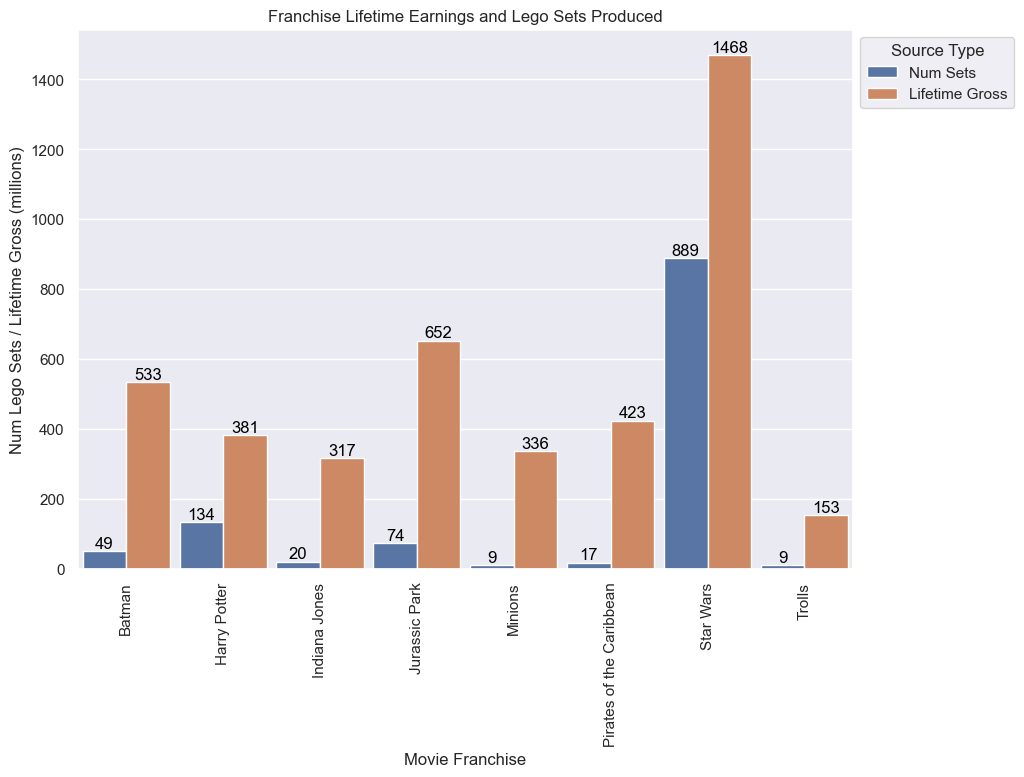

In [62]:
# ax = plt.subplots()

# ax = sns.barplot(x=earnings_and_sets['known_franchise'], y=earnings_and_sets['Lifetime Gross'],
#                  order=earnings_and_sets.sort_values('Lifetime Gross').known_franchise, color='#2a6a99', width=.85)


# ax = sns.barplot(x=earnings_and_sets['known_franchise'], y=earnings_and_sets['Num Sets'],
#                  order=earnings_and_sets.sort_values('Lifetime Gross').known_franchise, color='#de425b', width=.85)
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.barplot(data=earnings_and_sets_melt, x='known_franchise', y='value',
                 hue='Source Type', width=.9, errorbar=None)

# iterate through each container
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='edge', color='black')

ax.set(title='Franchise Lifetime Earnings and Lego Sets Produced',
       ylabel='Num Lego Sets / Lifetime Gross (millions)', xlabel='Movie Franchise')
# plt.yscale('log')
plt.xticks(rotation=90)
# plt.legend(title='', loc='upper left', labels=['# Sets', 'Lifetime Gross ($ mil)'])
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

In [ ]:
box_office_numbers

In [ ]:
imdb_titles

In [ ]:
box_office_expanded = box_office_numbers.merge(imdb_titles, left_on='#1 Release', right_on='primaryTitle')
box_office_expanded

In [ ]:
cleaned_cols = ['Franchise', 'Total', 'Lifetime Gross', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres']
box_office_cleaned = box_office_expanded[cleaned_cols]
box_office_cleaned

In [ ]:
box_office_cleaned = box_office_cleaned.drop_duplicates(subset = ['primaryTitle'], keep='first')
box_office_cleaned

In [ ]:
set_theme_cols = ['set_num', 'year', 'num_parts', 'parent_theme']
set_theme_cleaned = sets_and_themes_df[set_theme_cols]
set_theme_cleaned

In [ ]:
count_sets = set_theme_cleaned.groupby('year').count()
count_sets = count_sets.reset_index()
count_sets = count_sets[['year', 'set_num']]
count_sets = count_sets.rename(columns={'set_num': 'count_sets'})
count_sets

In [ ]:
count_parts = set_theme_cleaned[['year', 'num_parts']].groupby('year').mean().round(1)
count_parts = count_parts.reset_index()
count_parts.head()

In [ ]:
earnings_per_year = box_office_cleaned[['startYear', 'Lifetime Gross']].groupby('startYear').mean()
earnings_per_year = earnings_per_year.reset_index()
earnings_per_year = earnings_per_year.rename(columns={'Lifetime Gross': 'mean_yearly_earnings'})
earnings_per_year['mean_yearly_earnings'] = earnings_per_year['mean_yearly_earnings'].div(100000).round(1)
earnings_per_year.head()

In [ ]:
parts_sets_per_year = count_sets.merge(count_parts, left_on='year', right_on='year')
parts_sets_per_year

In [ ]:
parts_sets_earnings_per_year = parts_sets_per_year.merge(earnings_per_year, left_on='year', right_on='startYear')
parts_sets_earnings_per_year.drop(columns=['startYear'], inplace=True)
parts_sets_earnings_per_year.head()

In [ ]:
ax = plt.subplots()
ax = sns.lineplot(data=parts_sets_earnings_per_year, x='year', y='count_sets', label='Number of Sets')
ax = sns.lineplot(data=parts_sets_earnings_per_year, x='year', y='num_parts', label='Number of Parts')
ax = sns.lineplot(data=parts_sets_earnings_per_year, x='year', y='mean_yearly_earnings', label='Mean Yearly Earnings')
ax.set(title='Mean Yearly Box Office Earnings, Number of Sets, \nand Mean Number of Parts Produced', 
       ylabel='Number of Parts and Sets / Mean Earnings ($ mil)', xlabel='Year')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

In [ ]:
most_common_genre = box_office_cleaned[['startYear', 'genres']]

In [ ]:
genre_list = box_office_cleaned.genres.unique()
genres = set()
for genre_str in genre_list:
    for genre in genre_str.split(','):
        genres.add(genre)
genres = list(genres)
genres